# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

648

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create URL to get the weather info from the Weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Create empty lists for API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the counter 
record = 1

# Log file print statement
print(f"Retreiving Weather data for below cities")
print(f"----------------------------------------")

#Loop through the cities
for city in cities:  
    
    # Try statement to append calls where value is found 
    # If no city is found due to KeyError: skip and print "city not found"
    try: 
        response = requests.get(query_url +city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
               
        # Add one to record counter 
        record = record + 1
        
        # Wait a second in loop
        time.sleep(1.01)
        
    # If no record found "skip" 
    except KeyError:
        print("City not found. Skipping...")
    continue

Retreiving Weather data for below cities
----------------------------------------
Processing Record 1 | Ilulissat
Processing Record 2 | Sistranda
Processing Record 3 | Mataura
Processing Record 4 | Dillon
Processing Record 5 | Ténenkou
Processing Record 6 | Lata
Processing Record 7 | Avarua
Processing Record 8 | Zapolyarnyy
Processing Record 9 | Luján
Processing Record 10 | Ţaga
Processing Record 11 | Nushki
Processing Record 12 | San Cristobal
Processing Record 13 | Sal Rei
Processing Record 14 | Hasaki
Processing Record 15 | Tura
Processing Record 16 | Prince Rupert
Processing Record 17 | Bitung
Processing Record 18 | Cape Town
Processing Record 19 | Muswellbrook
Processing Record 20 | Nikolskoye
Processing Record 21 | Qaanaaq
Processing Record 22 | Saskylakh
Processing Record 23 | Touros
Processing Record 24 | Albany
Processing Record 25 | Rikitea
Processing Record 26 | Coquimbo
Processing Record 27 | Tuktoyaktuk
City not found. Skipping...
Processing Record 28 | Atuona
Processing R

Processing Record 229 | Matara
Processing Record 230 | Le Port
Processing Record 231 | Vila Velha
City not found. Skipping...
Processing Record 232 | Panji
Processing Record 233 | Kota Kinabalu
Processing Record 234 | Datong
Processing Record 235 | Yeppoon
Processing Record 236 | Kutum
Processing Record 237 | Xai-Xai
Processing Record 238 | Kinshasa
Processing Record 239 | Tiksi
Processing Record 240 | Maiduguri
Processing Record 241 | Vestmannaeyjar
Processing Record 242 | Ballina
Processing Record 243 | Dwārka
City not found. Skipping...
Processing Record 244 | Rome
City not found. Skipping...
Processing Record 245 | Shahdol
Processing Record 246 | Vostok
Processing Record 247 | Abhā
Processing Record 248 | Carnot
Processing Record 249 | Ipixuna
Processing Record 250 | Puerto Carreño
Processing Record 251 | Amapá
Processing Record 252 | Ozernovskiy
Processing Record 253 | Nome
Processing Record 254 | Altay
Processing Record 255 | Baruun-Urt
City not found. Skipping...
Processing Reco

Processing Record 461 | Kilindoni
Processing Record 462 | Nanton
Processing Record 463 | Muzhi
Processing Record 464 | Port Hardy
Processing Record 465 | Tevriz
Processing Record 466 | Ancud
Processing Record 467 | Chake Chake
Processing Record 468 | Maniitsoq
City not found. Skipping...
Processing Record 469 | Geraldton
Processing Record 470 | Drummondville
Processing Record 471 | Muzaffarabad
City not found. Skipping...
Processing Record 472 | La Seyne-sur-Mer
Processing Record 473 | Témiscaming
Processing Record 474 | Agadez
Processing Record 475 | Collie
Processing Record 476 | Verkhniye Sergi
City not found. Skipping...
Processing Record 477 | Havre-St-Pierre
City not found. Skipping...
Processing Record 478 | Codrington
Processing Record 479 | Mirny
Processing Record 480 | São Raimundo das Mangabeiras
Processing Record 481 | Kaseda-shirakame
Processing Record 482 | Ajdabiya
Processing Record 483 | Coburg
Processing Record 484 | Moerai
Processing Record 485 | Anakapalle
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness, 
    "Country": country,
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create a data frame the weather dictionary
weather_df = pd.DataFrame(weather_dict)

#Make weather df into csv file
weather_df.to_csv("output_data/cities.csv")

#Display the weather_df data
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ilulissat,100,GL,1621990184,64,69.2167,-51.1000,33.82,4.61
1,Sistranda,38,NO,1621990075,87,63.7256,8.8340,53.91,21.50
2,Mataura,100,NZ,1621990186,44,-46.1927,168.8643,49.48,2.44
3,Dillon,100,US,1621990188,85,34.4166,-79.3712,86.25,5.86
4,Ténenkou,100,ML,1621990189,30,14.4572,-4.9169,91.40,8.86


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

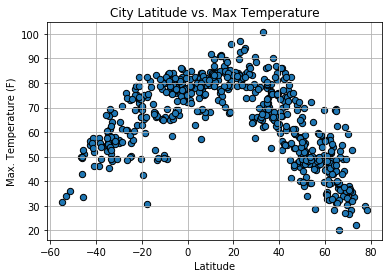

In [34]:
# Make a scatter plot to show Latitude Vs. Temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=40, edgecolors='black')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_MaxTemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

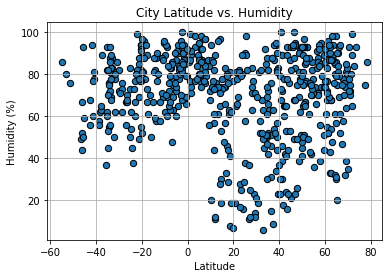

In [35]:
# Make a scatter plot to show Latitude Vs. Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=40, edgecolors='black')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

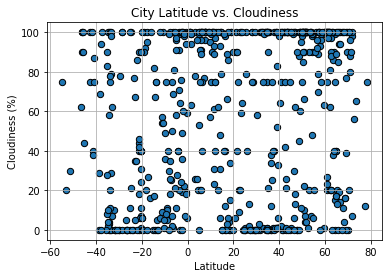

In [36]:
# Make a scatter plot to show Latitude Vs. Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=40, edgecolors='black')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

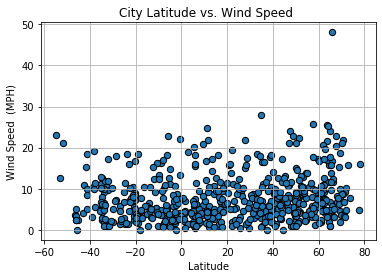

In [37]:
# Make a scatter plot to show Latitude Vs. Wind Speed 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=40, edgecolors='black')

# Specify labels and title for scatter plot
plt.title("City Latitude vs. Wind Speed ")
plt.ylabel("Wind Speed  (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [20]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ilulissat,100,GL,1621990184,64,69.2167,-51.1000,33.82,4.61
1,Sistranda,38,NO,1621990075,87,63.7256,8.8340,53.91,21.50
2,Mataura,100,NZ,1621990186,44,-46.1927,168.8643,49.48,2.44
3,Dillon,100,US,1621990188,85,34.4166,-79.3712,86.25,5.86
4,Ténenkou,100,ML,1621990189,30,14.4572,-4.9169,91.40,8.86
...,...,...,...,...,...,...,...,...,...
588,Yei,26,SS,1621990920,84,4.0950,30.6779,68.76,4.18
589,Padang,94,ID,1621990922,79,-0.9492,100.3543,81.86,2.66
590,Roald,20,NO,1621990923,87,62.5833,6.1333,52.16,19.57
591,Lloydminster,100,CA,1621990865,43,53.2835,-110.0016,50.09,6.35


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
NorthernHem = weather_df[weather_df['Lat']>0]
SouthernHem = weather_df[weather_df['Lat']<0]

The r-value is: -0.8155839163928912


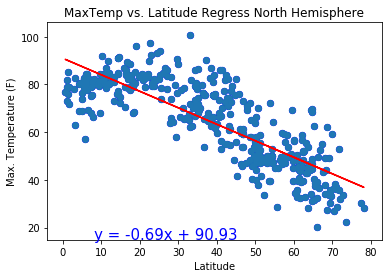

In [39]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(NorthernHem["Lat"], NorthernHem["Max Temp"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("MaxTemp vs. Latitude Regress North Hemisphere")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = NorthernHem['Lat']
y_axis = NorthernHem['Max Temp']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(8,15),fontsize=15,color="blue")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("MaxTemp_vs_Latitude_Regress_North_Hemisphere.png")

# Show plot
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7424548148452269


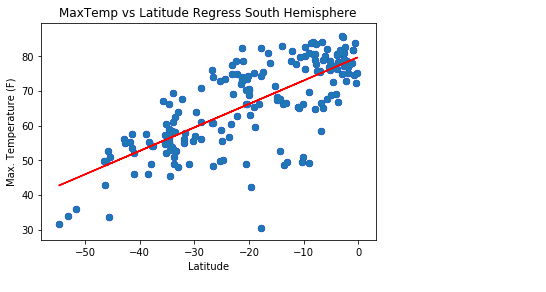

In [47]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(SouthernHem["Lat"], SouthernHem["Max Temp"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("MaxTemp vs Latitude Regress South Hemisphere")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = SouthernHem['Lat']
y_axis = SouthernHem['Max Temp']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(8,15),fontsize=15,color="blue")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("MaxTemp_vs_Latitude_Regress_South_Hemisphere.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03474946414901876


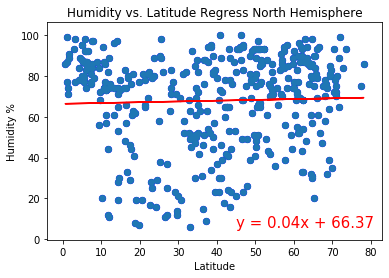

In [41]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(NorthernHem["Lat"], NorthernHem["Humidity"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Humidity vs. Latitude Regress North Hemisphere")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = NorthernHem['Lat']
y_axis = NorthernHem['Humidity']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,6),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Humidity_vs_Latitude_Regress_North_Hemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3085430714993837


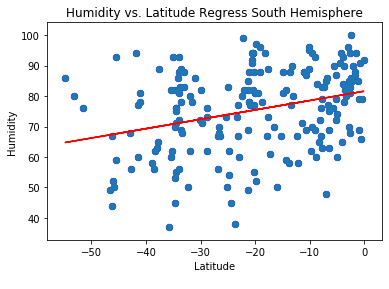

In [42]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(SouthernHem["Lat"], SouthernHem["Humidity"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Humidity vs. Latitude Regress South Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = SouthernHem['Lat']
y_axis = SouthernHem['Humidity']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Humidity_vs_Latitude_Regress_South_Hemisphere.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0064093986710730055


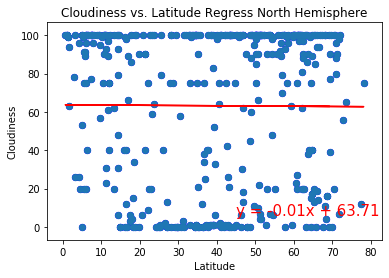

In [43]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(NorthernHem["Lat"], NorthernHem["Cloudiness"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Cloudiness vs. Latitude Regress North Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = NorthernHem['Lat']
y_axis = NorthernHem['Cloudiness']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,6),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Cloudiness_vs_Latitude_Regress_North_Hemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003176211190421533


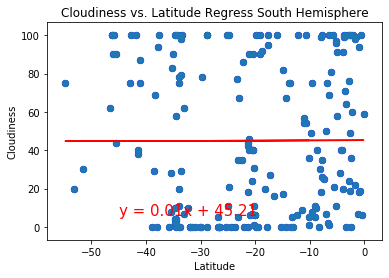

In [44]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(SouthernHem["Lat"], SouthernHem["Cloudiness"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Cloudiness vs. Latitude Regress South Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = SouthernHem['Lat']
y_axis = SouthernHem['Cloudiness']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-45,6),fontsize=15,color="red")

# Save the figure
plt.savefig("Cloudiness_vs_Latitude_Regress_South_Hemisphere.png")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.18730309709786525


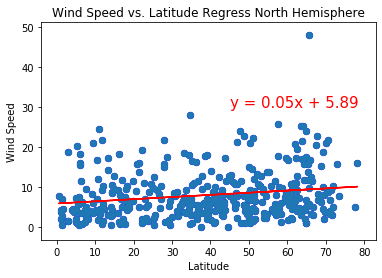

In [45]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(NorthernHem["Lat"], NorthernHem["Wind Speed"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Wind Speed vs. Latitude Regress North Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = NorthernHem['Lat']
y_axis = NorthernHem['Wind Speed']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude_Regress_North_Hemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12875411852278126


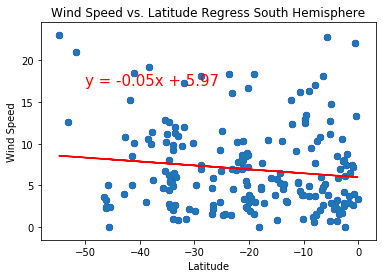

In [46]:
# Make a scatter plot to show Latitude Vs. Temperature for Northern Hemisphere
plt.scatter(SouthernHem["Lat"], SouthernHem["Wind Speed"], marker="o", s=40, color='blue')

# Specify labels and title for scatter plot
plt.title("Wind Speed vs. Latitude Regress South Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

x_axis = SouthernHem['Lat']
y_axis = SouthernHem['Wind Speed']

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude_Regress_South_Hemisphere.png")

# Show plot
plt.show()